# 프로젝트

## 목차
- 1. load_digits : 손글씨 이미지 데이터 분류
- 2. load_wine : 와인 데이터 분류
- 3. load_breast_cancer : 유방암 데이터 분류 

## 프로젝트 목표
- scikit-learn에 내장된 예제 데이터셋의 종류를 알고 활용할 수 있다.
- scikit-learn에 내장된 분류 모델들을 학습시키고 예측해 볼 수 있다.
- 모델의 성능을 평가하는 지표의 종류에 대해 이해하고, 활용 및 확인해 볼 수 있다.
- Decision Tree, XGBoost, RandomForest, 로지스틱 회귀 모델을 활용해서 간단하게 학습 및 예측해 볼 수 있다.
- 데이터셋을 사용해서 스스로 분류 기초 실습을 진행할 수 있다.

--- 

# load_digits : 손글씨 이미지 데이터 분류

## 필요한 모듈 import하기

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## 데이터 준비

In [7]:
# 데이터 불러오기
from sklearn.datasets import load_digits

digits = load_digits()

print(dir(digits))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


## 데이터 이해하기

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [14]:
digits_data = digits.data
digits_data.shape # 데이터 형태: (1797, 64)

(1797, 64)

In [57]:
# 64개의 숫자로 이루어진 배열(array)
print(len(digits_data[0]))
digits_data[0] 

64


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digits_label = digits.target

In [11]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

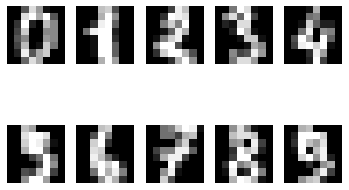

In [17]:
# data 시각화
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

## train, test 데이터 분리

In [13]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

## 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

In [29]:
f1_list = [] # 각 모델별 f1_score를 저장할 리스트

In [30]:
# 1) Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_list.append(f1)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360

0.8555555555555555


In [31]:
# 2) Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_list.append(f1)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360

0.9638888888888889


In [32]:
# 3) SVM
from sklearn import svm
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_list.append(f1)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

0.9888888888888889


In [33]:
# 4) SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_list.append(f1)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.85      0.95      0.90        42
           2       0.98      1.00      0.99        40
           3       0.89      0.94      0.91        34
           4       1.00      0.97      0.99        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.97      0.97      0.97        33
           8       0.88      0.88      0.88        43
           9       0.96      0.72      0.82        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

0.9388888888888889


In [34]:
# 5) Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=32)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
f1_list.append(f1)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

0.9527777777777777


C:\Users\sumin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 모델 평가해 보기

In [37]:
f1_score_df = pd.DataFrame({'name':['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression'],
                           'F1-score의 weighted avg':f1_list})
f1_score_df

,name,F1-score의 weighted avg
0,Decision Tree,0.853937
1,Random Forest,0.963546
2,SVM,0.988877
3,SGD Classifier,0.937863
4,Logistic Regression,0.952523


In [42]:
f1_score_df['F1-score의 weighted avg'] = round(f1_score_df['F1-score의 weighted avg'], ndigits=2)

In [48]:
f1_score_df = f1_score_df.sort_values("F1-score의 weighted avg", ascending=False)
f1_score_df

,name,F1-score의 weighted avg
2,SVM,0.99
1,Random Forest,0.96
4,Logistic Regression,0.95
3,SGD Classifier,0.94
0,Decision Tree,0.85


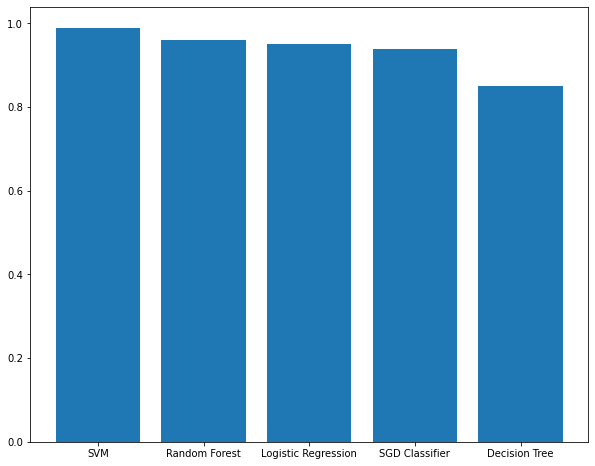

In [49]:
plt.figure(figsize=(10, 8))
plt.bar(f1_score_df["name"], f1_score_df["F1-score의 weighted avg"])
plt.show()

## 결론

- F1 score은 Recall과 Precision의 조화평균 사용
- F1 score 선택 (모델의 평균적인 성능 비교 시 유용)
- 다중 클래스(10개) 분류이며 전체적인 성능 비교가 중요하므로 F1-score의 weighted avg로 평가
- SVM, Random Forest, Logistic Regression, SGD Classifier Decision Tree 순으로 모델 성능이 좋았음.

# load_wine : 와인 데이터 분류

## 필요한 모듈 import하기

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score

## 데이터 준비

In [62]:
from sklearn.datasets import load_wine

wine = load_wine()
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


## 데이터 이해하기

- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해보기

In [63]:
wine_data = wine.data

In [65]:
wine_data.shape

(178, 13)

In [66]:
wine_label = wine.target

In [70]:
print(wine_label.shape)
wine_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [71]:
# 0,1,2 클래스로 와인을 분류
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [72]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## train, test 데이터 분리

In [73]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

## 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

In [85]:
precision_list = [] # 각 모델별 precision을 저장할 리스트

In [86]:
# 1) Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
precision_list.append(precision)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36

0.9444444444444444


In [87]:
# 2) Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
precision_list.append(precision)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

1.0


In [88]:
# 3) SVM
from sklearn import svm
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
precision_list.append(precision)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36

0.6111111111111112


In [89]:
# 4) SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
precision_list.append(precision)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.59      0.94      0.73        17
           2       0.00      0.00      0.00        12

    accuracy                           0.64        36
   macro avg       0.46      0.65      0.53        36
weighted avg       0.43      0.64      0.51        36

0.6388888888888888


C:\Users\sumin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sumin\anaconda3\lib\site-packages\sklearn\metrics\_classifi

In [90]:
# 5) Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=32)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
precision_list.append(precision)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36

0.9722222222222222


C:\Users\sumin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 모델 평가해 보기

In [91]:
precision_score_df = pd.DataFrame({'name':['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression'],
                           'Precision-score의 weighted avg':precision_list})
precision_score_df

,name,Precision-score의 weighted avg
0,Decision Tree,0.950292
1,Random Forest,1.000000
2,SVM,0.550214
3,SGD Classifier,0.431070
4,Logistic Regression,0.973765


In [92]:
precision_score_df['Precision-score의 weighted avg'] = round(precision_score_df['Precision-score의 weighted avg'], ndigits=2)

In [93]:
precision_score_df = precision_score_df.sort_values("Precision-score의 weighted avg", ascending=False)
precision_score_df

,name,Precision-score의 weighted avg
1,Random Forest,1.00
4,Logistic Regression,0.97
0,Decision Tree,0.95
2,SVM,0.55
3,SGD Classifier,0.43


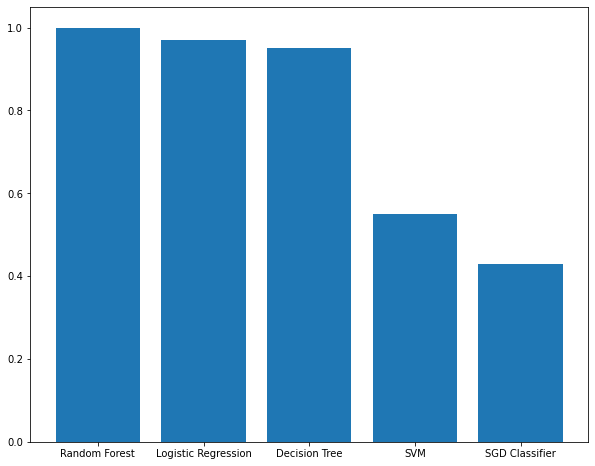

In [94]:
plt.figure(figsize=(10, 8))
plt.bar(precision_score_df["name"], precision_score_df["Precision-score의 weighted avg"])
plt.show()

## 결론

- precision(정밀도): 어떠한 클래스(예시: 클래스 A)로 분류한 데이터 중 실제로 클래스 A일 비율 (높을수록 좋다.)
- 즉, 정밀도는 예측한 데이터 셋 중 얼마나 실제와 일치하는 지 보는 것
- 예측한 와인 클래스가 실제로 얼마나 일치했는지 확인
- Random Forest가 1로 월등하게 높게 나왔는데 1이 나올 수 있는지 좀 더 확인이 필요함

# load_breast_cancer : 유방암 데이터 분류

## 필요한 모듈 import 하기

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 데이터 준비

In [99]:
# 데이터 불러오기
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(dir(cancer))
# dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


## 데이터 이해하기
- Feature Data 지정하기
- Label Data 지정하기
- Target Names 출력해 보기
- 데이터 Describe 해 보기

In [101]:
cancer_data = cancer.data
cancer_data.shape

(569, 30)

In [108]:
print(len(cancer_data[0]))

30


In [110]:
# 암이 맞거나 아니거나
cancer_label = cancer.target
cancer_label 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [106]:
# malignant(악성), benign(양성)
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [107]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [111]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [112]:
print('data =>',cancer.data.shape)
print('target =>',cancer.target.shape)

malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

print('malignant(악성) =>',malignant.shape)
print('benign(양성) =>',benign.shape)

data => (569, 30)
target => (569,)
malignant(악성) => (212, 30)
benign(양성) => (357, 30)


## train, test 데이터 분리

In [113]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

## 다양한 모델로 학습시켜보기
- Decision Tree 사용해 보기
- Random Forest 사용해 보기
- SVM 사용해 보기
- SGD Classifier 사용해 보기
- Logistic Regression 사용해 보기

In [116]:
recall_list = []

In [117]:
# 1) Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
recall_list.append(recall)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114

0.9122807017543859


In [118]:
# 2) Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
recall_list.append(recall)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

1.0


In [119]:
# 3) SVM
from sklearn import svm
svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
recall_list.append(recall)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114

0.9035087719298246


In [120]:
# 4) SGD Classifier
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
recall_list.append(recall)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114

0.8947368421052632


In [121]:
# 5) Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(random_state=32)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
recall_list.append(recall)

print(classification_report(y_test, y_pred))
print(accuracy)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

0.9473684210526315


C:\Users\sumin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 모델 평가해 보기

In [122]:
recall_score_df = pd.DataFrame({'name':['Decision Tree', 'Random Forest', 'SVM', 'SGD Classifier', 'Logistic Regression'],
                           'Recall-score의 weighted avg':recall_list})

In [123]:
recall_score_df

,name,Recall-score의 weighted avg
0,Decision Tree,0.912281
1,Random Forest,1.000000
2,SVM,0.903509
3,SGD Classifier,0.894737
4,Logistic Regression,0.947368


In [124]:
recall_score_df['Recall-score의 weighted avg'] = round(recall_score_df['Recall-score의 weighted avg'], ndigits=2)

In [127]:
recall_score_df = recall_score_df.sort_values("Recall-score의 weighted avg", ascending=False)
recall_score_df

,name,Recall-score의 weighted avg
1,Random Forest,1.00
4,Logistic Regression,0.95
0,Decision Tree,0.91
2,SVM,0.90
3,SGD Classifier,0.89


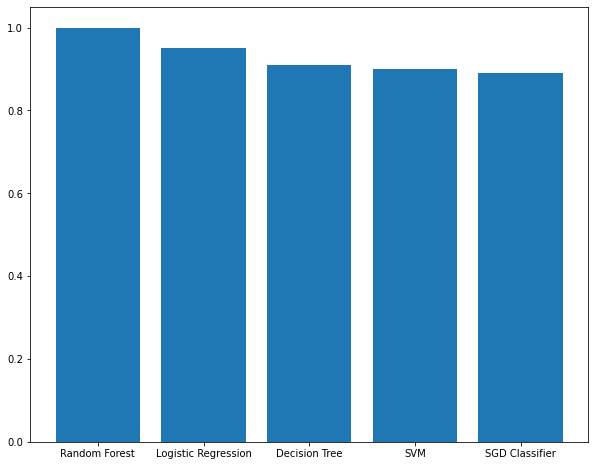

In [129]:
plt.figure(figsize=(10, 8))
plt.bar(recall_score_df["name"], recall_score_df["Recall-score의 weighted avg"])
plt.show()

## 결론

- 암을 진단하는 경우 실제 환자를 한 명이라도 놓치면 안된다. 
- 즉, 양성을 음성으로 판단하면 안 되기 때문에 Recall이 가장 중요!
- Random Forest가 와인 분류와 마찬가지로 월등하게 높게 나왔는데 왜 Random Forest가 가장 성능이 좋은지 스터디 필요